# Obesity Status Based on Eating Habits and Physical Condition
by Anam Khan, Farah Mallah, Liis Usin, Reihaneh Sadraei

## Explore the data
Loading the dataset and displaying basic information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data set and check the values present

data = pd.read_csv('ObesityDataSet.csv', delimiter=',')
print(str(data.shape[0])+' rows,', len(data.columns), 'columns')
data.sample(5)

2111 rows, 17 columns


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
828,Female,21.987341,1.730182,78.554440,yes,yes,2.293705,1.000000,Sometimes,no,2.000000,no,2.063943,0.000000,Sometimes,Public_Transportation,Overweight_Level_I
1309,Female,37.597953,1.629010,80.000000,yes,yes,2.450784,2.952821,Sometimes,no,1.335192,no,0.180276,0.000000,Sometimes,Automobile,Obesity_Type_I
593,Male,18.274358,1.824655,58.621349,yes,yes,2.140840,4.000000,Sometimes,no,2.931438,no,2.000000,1.164457,no,Automobile,Insufficient_Weight
1725,Male,30.638944,1.680489,102.004554,yes,yes,2.938687,2.138375,Sometimes,no,1.251715,no,1.181811,0.778375,no,Public_Transportation,Obesity_Type_II
1594,Male,24.408805,1.779547,118.740035,yes,yes,2.736298,2.992903,Sometimes,no,2.045561,no,0.854957,0.428452,Sometimes,Public_Transportation,Obesity_Type_II


In [3]:
# check if any none/null values

data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [4]:
# basic information about each columns and its dataset
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

### Below we will separate the obesity types into 2 different categories, as overweight and not overweight

In [6]:
# the column to analyze and to categorize
column_name = 'NObeyesdad'

# Get the unique non-numerical values and their counts in the specified column
unique_values_count = data[column_name].value_counts()

# Get the total number of unique non-numerical values
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'NObeyesdad': 7
Value counts:
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64


In [7]:
# the column to analyze
column_name = 'CAEC'

# Get the unique non-numerical values and their counts in the specified column
unique_values_count = data[column_name].value_counts()

# Get the total number of unique non-numerical values
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'CAEC': 4
Value counts:
Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64


In [8]:
# Classify the set into 2 categories
def classify_overweight(weight_status):
    overweight_classes = [
        'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III',
        'Overweight_Level_I', 'Overweight_Level_II']
    if weight_status in overweight_classes:
        return 'Overweight'
    else:
        return 'Not Overweight'

In [9]:
# Create a DataFrame from the data
df = pd.DataFrame(data)

In [10]:
# Apply the function to create a new column
df['Status'] = df['NObeyesdad'].apply(classify_overweight)

In [11]:
# drop the old column
df = df.drop('NObeyesdad', axis=1)

In [12]:
# check the data again
df.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Status
1807,Female,22.392510,1.655630,121.205171,yes,yes,3.00000,3.000000,Sometimes,no,1.347559,no,0.462951,0.317940,Sometimes,Public_Transportation,Overweight
342,Male,23.000000,1.740000,105.000000,yes,yes,3.00000,3.000000,Sometimes,no,2.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight
1275,Male,21.098035,1.690437,96.366777,yes,yes,2.00000,2.958330,Sometimes,no,2.000000,no,0.000000,1.595306,no,Public_Transportation,Overweight
112,Female,18.000000,1.560000,51.000000,yes,yes,2.00000,4.000000,Frequently,no,2.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Not Overweight
1172,Female,34.176795,1.681021,77.392179,yes,yes,2.79606,1.971472,Sometimes,no,1.921601,no,0.935217,0.704637,no,Automobile,Overweight


In [13]:
# the column to analyze
column_name = 'Status'

# Get the unique non-numerical values and their counts in the specified column
unique_values_count = data[column_name].value_counts()

# Get the total number of unique non-numerical values
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'Status': 2
Value counts:
Overweight        1552
Not Overweight     559
Name: Status, dtype: int64


## Visualize relationships / plot the data

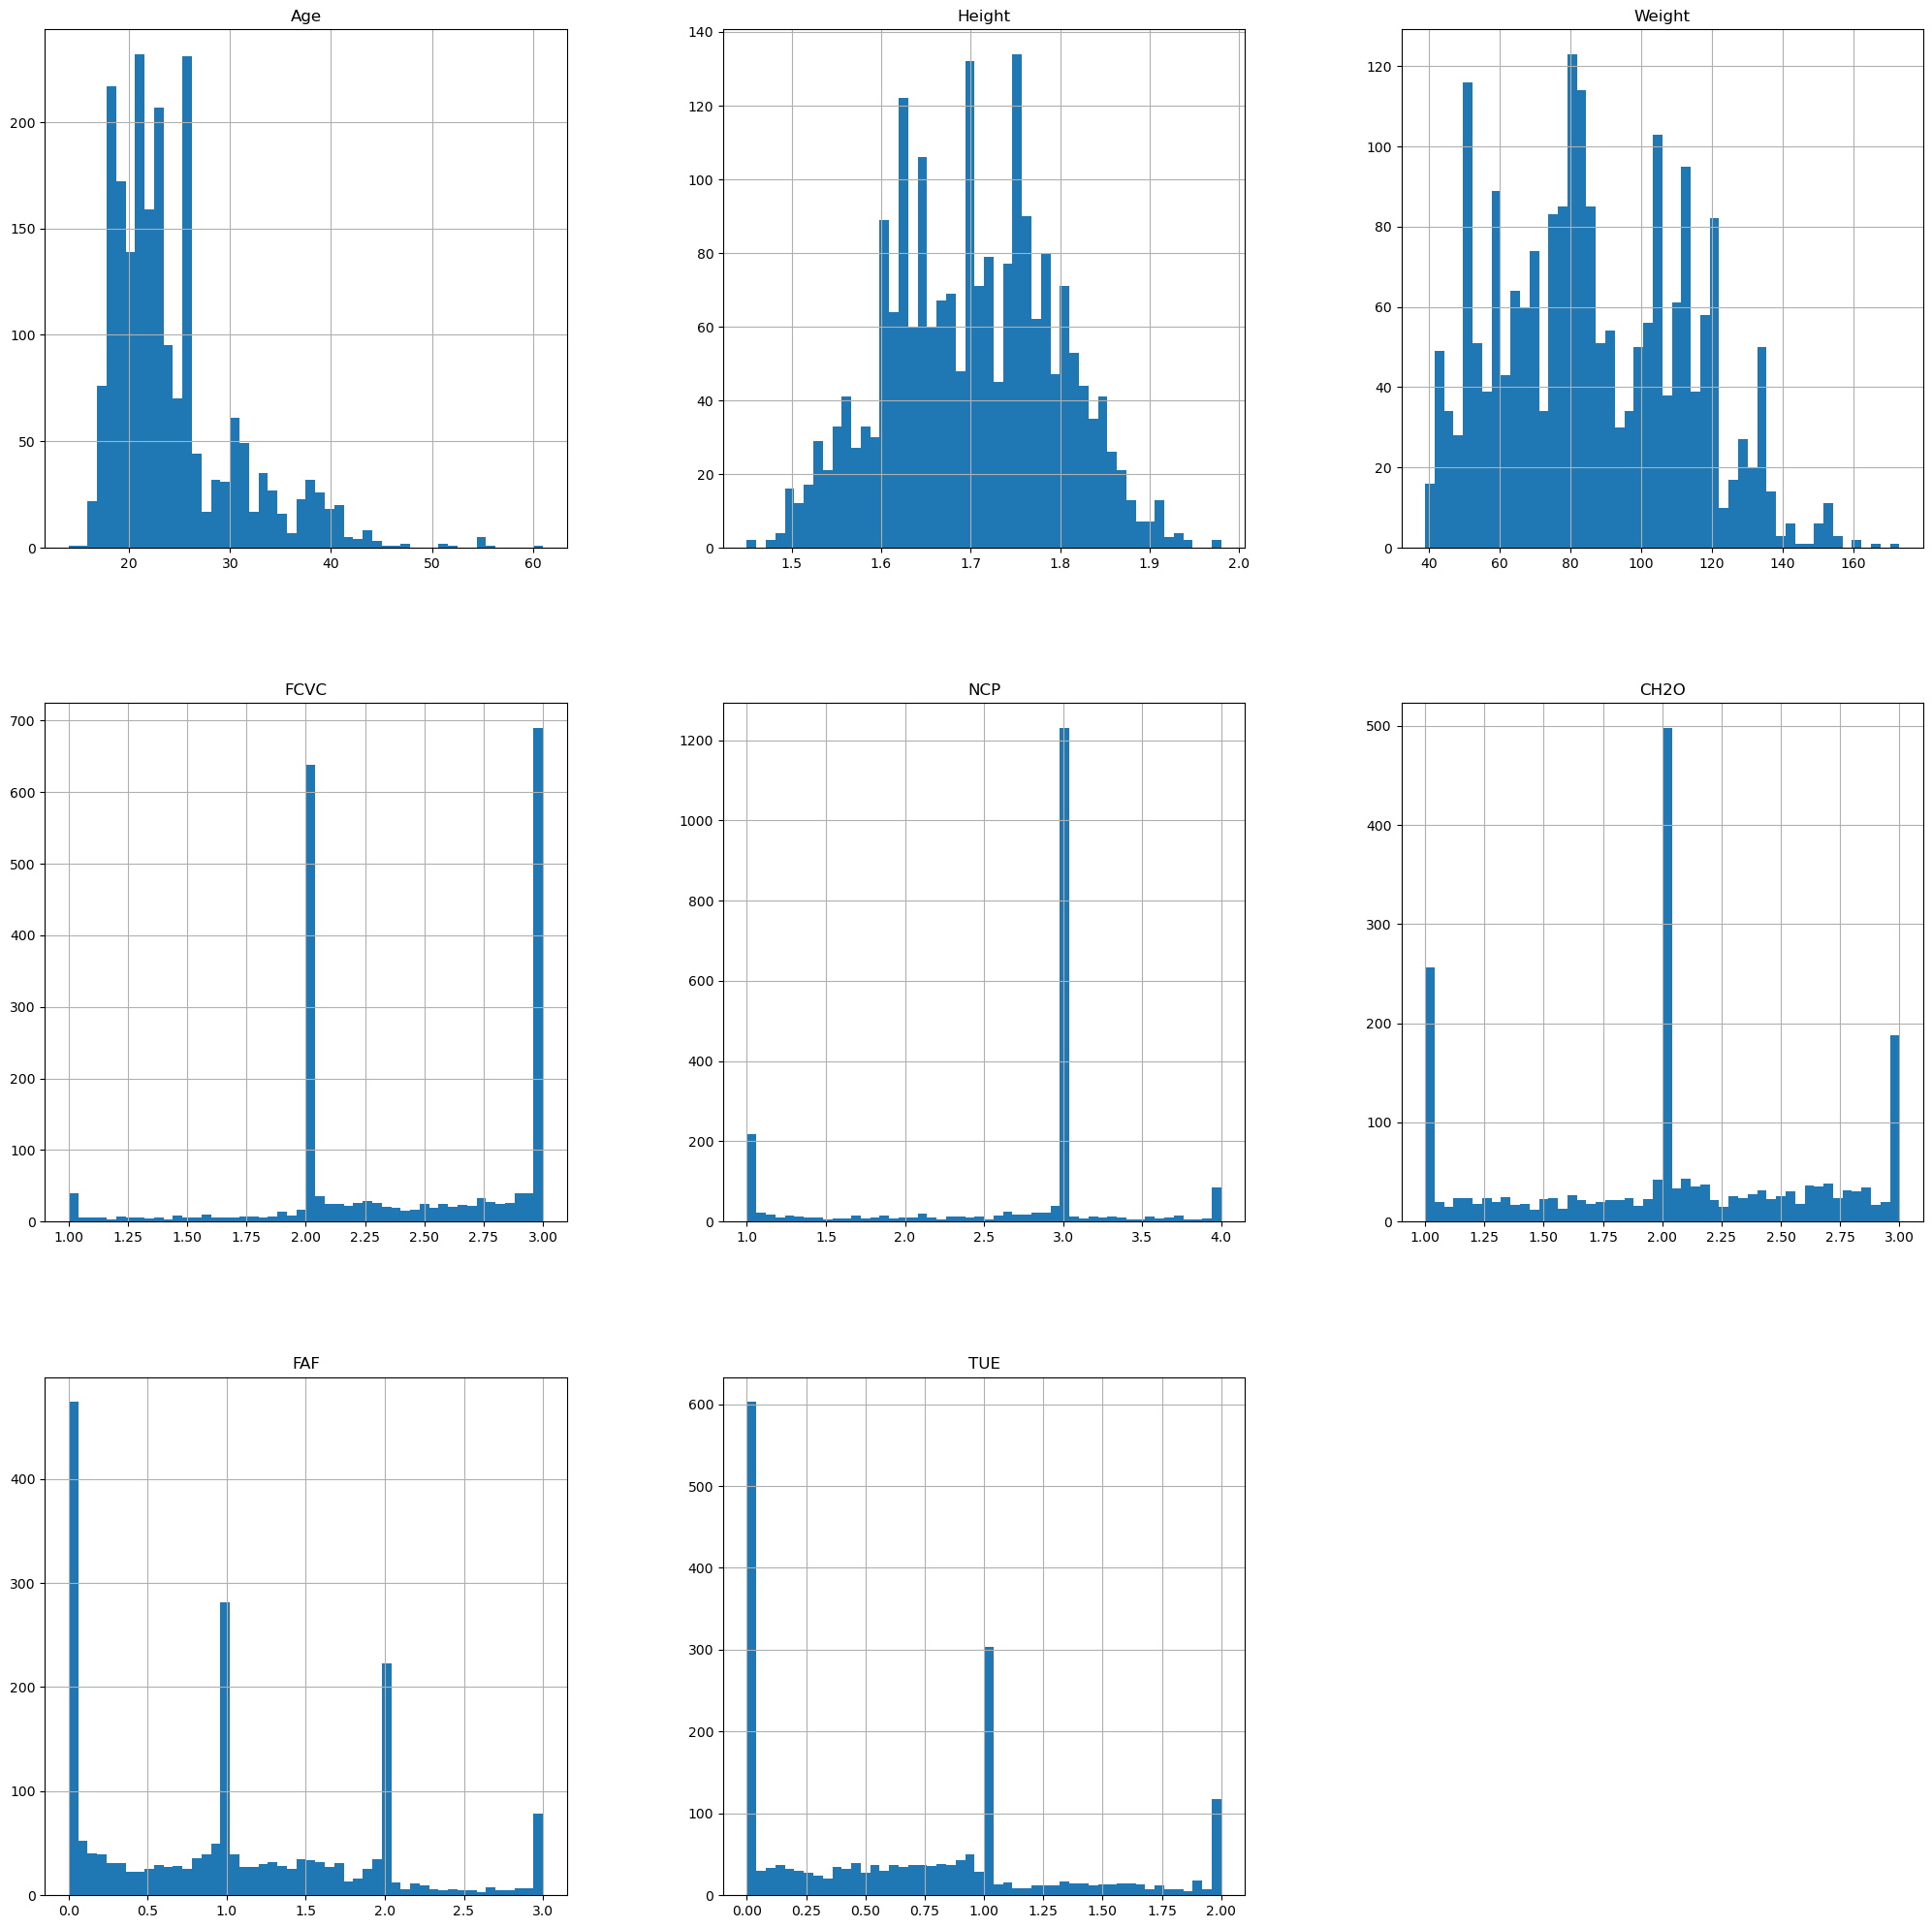

In [14]:
%matplotlib inline
data.hist(bins=50, figsize=(25,25))
plt.show()

In [15]:
df.replace({"Status":{        
    "Overweight":1,
    "Not Overweight":0
}},inplace=True)

The attributes related with the eating habits are:
- Frequent consumption of high caloric food (FAVC),
- Frequency of consumption of vegetables (FCVC),
- Number of main meals (NCP),
- Consumption of food between meals (CAEC),
- Consumption of water daily (CH20),
- and Consumption of alcohol (CALC).

The attributes related with the physical condition are:
- Calories consumption monitoring (SCC),
- Physical activity frequency (FAF),
- Time using technology devices (TUE),
- Transportation used (MTRANS),

<AxesSubplot:>

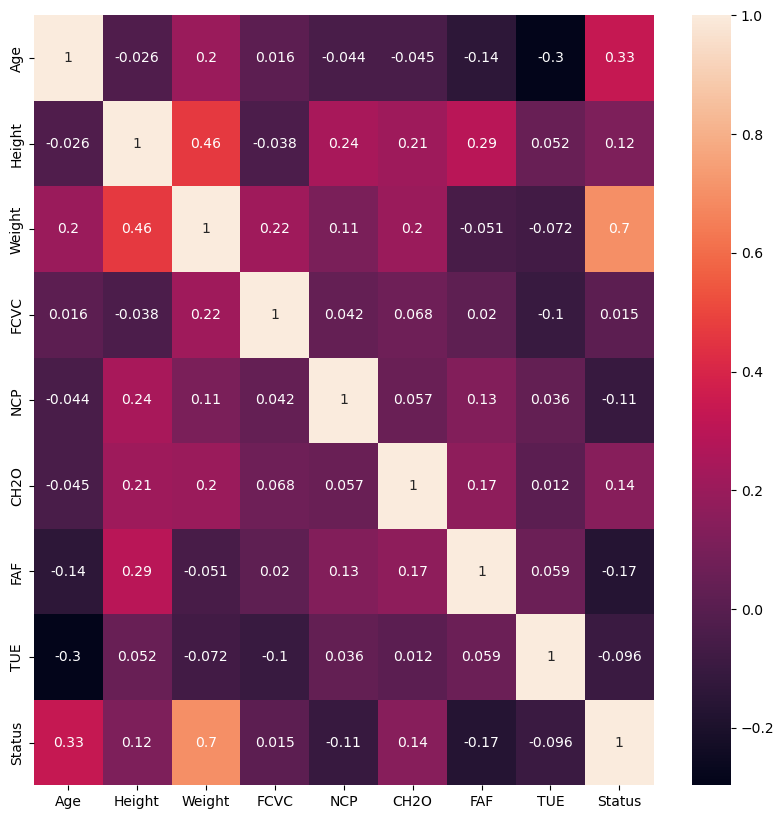

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr, annot=True)

## Prepare the data
Preparing the data for modeling by handling missing values, encoding categorical features, scaling features, and splitting the data into training and testing sets.

In [17]:
# separating the last column from the rest
X_original=df.drop(columns="Status")
y=df["Status"]

In [18]:
# split data to numerical and categorical way

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

def prepare_data(X):
    numeric_columns = X.select_dtypes(exclude='object').columns
    categorical_columns = X.select_dtypes(include='object').columns

    numeric_features = Pipeline([
        ('handlingmissingvalues',SimpleImputer(strategy='median')),
        ('scaling',StandardScaler(with_mean=True))
    ])

    categorical_features = Pipeline([
        ('handlingmissingvalues',SimpleImputer(strategy='most_frequent')),
        ('encoding', OneHotEncoder()),
        ('scaling', StandardScaler(with_mean=False))
    ])

    processing = ColumnTransformer([
        ('numeric', numeric_features, numeric_columns),
        ('categorical', categorical_features, categorical_columns)
    ])

    return processing.fit_transform(X)

In [19]:
X=prepare_data(X_original)
X

array([[-0.52212439, -0.87558934, -0.86255819, ...,  0.        ,
         2.30468953,  0.        ],
       [-0.52212439, -1.94759928, -1.16807699, ...,  0.        ,
         2.30468953,  0.        ],
       [-0.20688898,  1.05402854, -0.36609013, ...,  0.        ,
         2.30468953,  0.        ],
       ...,
       [-0.28190933,  0.54167211,  1.79886776, ...,  0.        ,
         2.30468953,  0.        ],
       [ 0.00777624,  0.40492652,  1.78577968, ...,  0.        ,
         2.30468953,  0.        ],
       [-0.10211908,  0.39834438,  1.7905916 , ...,  0.        ,
         2.30468953,  0.        ]])

## Create Training and Test set

In [20]:
# splitting to training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train X dataset shape:',X_train.shape)
print('Train y dataset shape', y_train.shape)
print('Test X dataset shape:',X_test.shape)
print('Test y dataset shape', y_test.shape)

Train X dataset shape: (1688, 31)
Train y dataset shape (1688,)
Test X dataset shape: (423, 31)
Test y dataset shape (423,)


## Helper function

In [21]:
from sklearn.metrics import confusion_matrix

def print_confusion_matrix(model):
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    ax= plt.subplot()
    ax.set_title('Confusion Matrix')
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    plt.show()

In [22]:
from sklearn.metrics import classification_report

def print_classification_report(model):
    print('Classification report:')
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))

In [23]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

def print_roc_curve(model):
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    curve.plot()
    plt.show()

# Build ML models

### Logistic regression

Logistic regression


C:\Users\liisu\anaconda3\envs\Machine_Learning_Env\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


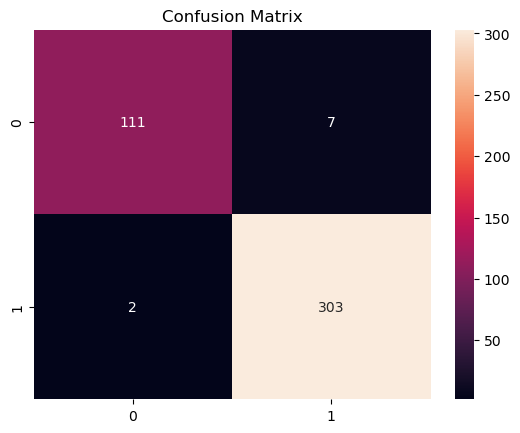

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       118
           1       0.98      0.99      0.99       305

    accuracy                           0.98       423
   macro avg       0.98      0.97      0.97       423
weighted avg       0.98      0.98      0.98       423



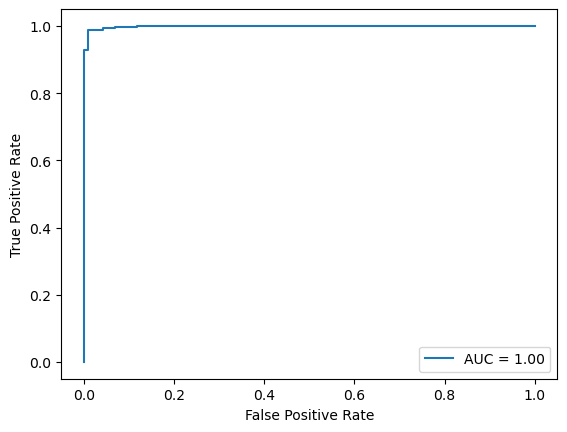

In [24]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train, y_train)

print('Logistic regression')
print_confusion_matrix(lr_clf)
print_classification_report(lr_clf)
print_roc_curve(lr_clf)

In [25]:
# OUTLIERS's need to be removed???!

# balance the data

## Random Forest

Random forest classifier


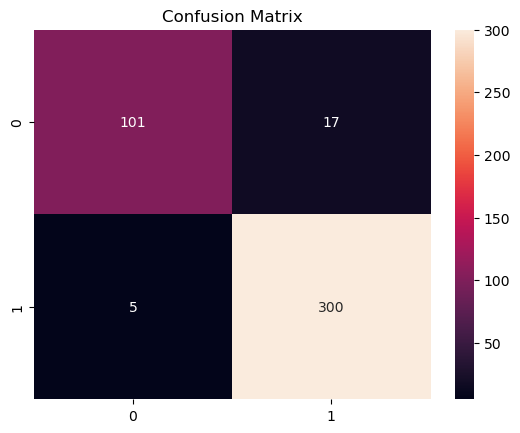

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       118
           1       0.95      0.98      0.96       305

    accuracy                           0.95       423
   macro avg       0.95      0.92      0.93       423
weighted avg       0.95      0.95      0.95       423



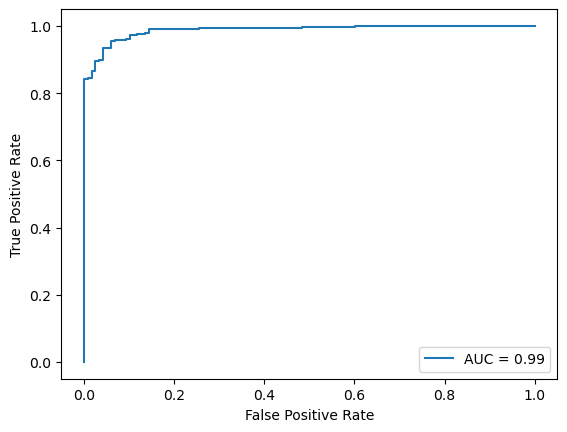

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, 
                                bootstrap=1,
                                criterion='gini',
                                max_depth=10,
                                max_features=2,
                                min_samples_leaf=5,
                                min_samples_split=3, 
                                n_estimators=185)
rf_clf.fit(X_train, y_train)

print('Random forest classifier')
print_confusion_matrix(rf_clf)
print_classification_report(rf_clf)    
print_roc_curve(rf_clf)